##AGENDA

#INTRODUCCION
#INSPECCION DE DATOS Y LIMPIEZA
#ANALISIS GRAFICO DE EDA
#CONCLUSIONES

In [ ]:
#QUE ES EDA?
#TECNICA QUE PERMITE ANALIZAR E INVESTIGAR DATOS E IDENTIFICAR SUS CARACTERISTICAS PRINCIPALES EN UN DATASET. SU PRINCIPAL VENTAKA ES PROVEER VISUALIZACION DE DATOS DESPUES DE LA CONDUCCION DE UN ANALISIS

##2. Análisis inicial de los datos https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+conditionht

Se realizará un análisis EDA usando Python para examinar el nivel de obesidad de un individio en función a muchos factores como por ejemplo la edad, el género, la estatura, consumo de alcohol, etc.

La obesidad se ha convertido en un problema de salud pública en muchos países, incluyendo Colombia y Perú, y su estudio es esencial para entender sus implicaciones sociales, económicas y de salud. La prevalencia de la obesidad ha aumentado de manera alarmante en las últimas décadas, convirtiéndose en un factor de riesgo significativo para enfermedades crónicas como la diabetes tipo 2, enfermedades cardiovasculares y ciertos tipos de cáncer.

Uno de los principales motivos por los que es necesario estudiar la obesidad en Colombia y Perú es el impacto que tiene en la salud de la población. Según la Organización Mundial de la Salud (OMS), la obesidad es un problema que afecta a personas de todas las edades y estratos socioeconómicos. En estos países, las tasas de obesidad han ido en aumento, especialmente entre los niños y adolescentes. Esto no solo afecta su calidad de vida, sino que también incrementa la carga para los sistemas de salud, que deben gestionar un mayor número de enfermedades asociadas. El estudio de la obesidad permite identificar las causas subyacentes y desarrollar intervenciones efectivas.

Además, la obesidad está vinculada a factores culturales y sociales que requieren un análisis profundo. En Colombia y Perú, la percepción de la obesidad y la delgadez puede variar significativamente entre diferentes grupos sociales y regiones. Es fundamental comprender cómo las creencias culturales, la publicidad, el acceso a alimentos saludables y la educación nutricional influyen en los hábitos alimenticios y en la actividad física de la población. Por lo tanto, el estudio de la obesidad no solo implica una mirada médica, sino también una aproximación interdisciplinaria que incluya la antropología, la sociología y la economía.

Otro aspecto crucial es la carga económica que la obesidad representa para estos países. Los costos directos e indirectos relacionados con el tratamiento de enfermedades asociadas a la obesidad son significativos. En un contexto donde los recursos de salud son limitados, es vital estudiar la obesidad para justificar inversiones en programas de prevención y tratamiento. Al abordar la obesidad de manera proactiva, se pueden reducir los costos a largo plazo, mejorando así la sostenibilidad del sistema de salud.

El estudio de la obesidad también tiene implicaciones para las políticas públicas. En Colombia y Perú, es fundamental desarrollar estrategias efectivas que promuevan estilos de vida saludables y la alimentación equilibrada. Esto incluye la implementación de campañas de concientización, la regulación de la publicidad de alimentos no saludables, y la creación de espacios para la actividad física en las comunidades. Con un enfoque basado en la evidencia, se pueden diseñar políticas que no solo reduzcan las tasas de obesidad, sino que también mejoren la salud general de la población.

Finalmente, la obesidad es un fenómeno que afecta la autoestima y la salud mental de los individuos. El estigma asociado con la obesidad puede llevar a problemas de ansiedad y depresión, lo que a su vez dificulta el tratamiento y la prevención. Estudiar esta relación es crucial para desarrollar intervenciones que no solo aborden el aspecto físico, sino que también brinden apoyo psicológico a quienes lo necesiten.

En resumen, estudiar la obesidad en Colombia y Perú es fundamental para entender su complejidad y sus múltiples dimensiones. La salud de la población, la economía del país, las políticas públicas y el bienestar individual están intrínsecamente relacionados con este fenómeno. La investigación en este campo es un paso esencial hacia la creación de soluciones efectivas y sostenibles que mejoren la calidad de vida de millones de personas en la región.




escribir datos como cantidad de features, registros, variables que se estan usando, tipo de variable que se esta usando


# Instances
2111

# Features
17


#Definición de las Features
Gender: Género del individuo.

Age: Edad del individuo.

Height: Altura del individuo.

Weight: Peso del individuo.

family_history_with_overweight: Indica si hay antecedentes familiares de sobrepeso.

FAVC: Frecuencia de consumo de alimentos altos en calorías.

FCVC: Frecuencia de consumo de verduras en las comidas.

NCP: Número de comidas principales que consume diariamente.

CAEC: Indica si se come entre comidas.

SMOKE: Indica si la persona fuma.

CH2O: Cantidad de agua que se bebe diariamente.

SCC: Indica si se monitorean las calorías consumidas diariamente.

FAF: Frecuencia de actividad física.

TUE: Tiempo de uso de dispositivos tecnológicos.

CALC: Frecuencia de consumo de alcohol.

MTRANS: Modo de transporte utilizado.

NObeyesdad: Nivel de obesidad (variable objetivo).

#Variables que se están usando
Variables Demográficas: Gender, Age, Height, Weight

Variables de Comportamiento y Hábitos: family_history_with_overweight, FAVC, FCVC, NCP, CAEC, SMOKE, CH2O, SCC, FAF, TUE, CALC, MTRANS

Variable Objetivo: NObeyesdad

#Tipo de Variable que se está usando

###Categorical (Categórica):
Gender
CAEC
CALC
MTRANS
NObeyesdad
##3Continuous (Continua):
Age
Height
Weight
NCP
CH2O
FAF
###Binary (Binaria):
family_history_with_overweight
FAVC
SMOKE
SCC
###Integer (Entera):
FCVC
TUE

In [4]:
import pandas as pd #manipulacion y analisis de datos
import numpy as np #calculos matematicos
from scipy.stats import trim_mean #estadistica
from statsmodels import robust
import seaborn as sns #graficas bonitas
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

In [6]:
data=pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [7]:
data.tail()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III
2110,Female,23.664709,1.738836,133.472641,yes,yes,3.0,3.0,Sometimes,no,2.863513,no,1.026452,0.714137,Sometimes,Public_Transportation,Obesity_Type_III


In [8]:
data.sample()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
371,Male,17.0,1.62,69.0,yes,yes,3.0,1.0,Always,no,2.0,yes,1.0,2.0,Sometimes,Public_Transportation,Overweight_Level_I


In [9]:
data.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [14]:
file_path = '/content/ObesityDataSet_raw_and_data_sinthetic.csv'
data = pd.read_csv(file_path)

# Eliminar duplicados
data = data.drop_duplicates()

# Obtener solo las columnas de tipo flotante
float_columns = data.select_dtypes(include=['float64'])

# Obtener una descripción general solo de las columnas flotantes
float_description = float_columns.describe()

# Mostrar valores típicos de las características flotantes
print("Valores típicos de las características flotantes:\n")
for column in float_description.columns:
    print(f"Feature: {column}")
    print(f"  Tipo: {data[column].dtype}")
    print(f"  Valores típicos:\n{float_description[column]}\n")

# Agrupar y contar variables que no son flotantes
non_float_columns = data.select_dtypes(exclude=['float64']).columns

for column in non_float_columns:
    count = data.groupby(column).size().reset_index(name='Count')
    print(f"Conteo de registros para la feature '{column}':\n")
    print(count)
    print("\n" + "="*50 + "\n")  # Separador entre resultados

Valores típicos de las características flotantes:

Feature: Age
  Tipo: float64
  Valores típicos:
count    2087.000000
mean       24.353090
std         6.368801
min        14.000000
25%        19.915937
50%        22.847618
75%        26.000000
max        61.000000
Name: Age, dtype: float64

Feature: Height
  Tipo: float64
  Valores típicos:
count    2087.000000
mean        1.702674
std         0.093186
min         1.450000
25%         1.630178
50%         1.701584
75%         1.769491
max         1.980000
Name: Height, dtype: float64

Feature: Weight
  Tipo: float64
  Valores típicos:
count    2087.000000
mean       86.858730
std        26.190847
min        39.000000
25%        66.000000
50%        83.101100
75%       108.015907
max       173.000000
Name: Weight, dtype: float64

Feature: FCVC
  Tipo: float64
  Valores típicos:
count    2087.000000
mean        2.421466
std         0.534737
min         1.000000
25%         2.000000
50%         2.396265
75%         3.000000
max         

In [15]:
#encontrar valores perdidos
valores_perdidos=data.isnull().sum()
print(valores_perdidos)

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


In [17]:
#valores duplicados
duplicate_rows=data.duplicated().sum()
print(duplicate_rows)

0


In [18]:
#eliminar datos duplicados
data_cleaned = data.drop_duplicates()
print(data_cleaned)

      Gender        Age    Height      Weight family_history_with_overweight  \
0     Female  21.000000  1.620000   64.000000                            yes   
1     Female  21.000000  1.520000   56.000000                            yes   
2       Male  23.000000  1.800000   77.000000                            yes   
3       Male  27.000000  1.800000   87.000000                             no   
4       Male  22.000000  1.780000   89.800000                             no   
...      ...        ...       ...         ...                            ...   
2106  Female  20.976842  1.710730  131.408528                            yes   
2107  Female  21.982942  1.748584  133.742943                            yes   
2108  Female  22.524036  1.752206  133.689352                            yes   
2109  Female  24.361936  1.739450  133.346641                            yes   
2110  Female  23.664709  1.738836  133.472641                            yes   

     FAVC  FCVC  NCP       CAEC SMOKE  

In [20]:
#identificacion de NaN
print(data.isna())

      Gender    Age  Height  Weight  family_history_with_overweight   FAVC  \
0      False  False   False   False                           False  False   
1      False  False   False   False                           False  False   
2      False  False   False   False                           False  False   
3      False  False   False   False                           False  False   
4      False  False   False   False                           False  False   
...      ...    ...     ...     ...                             ...    ...   
2106   False  False   False   False                           False  False   
2107   False  False   False   False                           False  False   
2108   False  False   False   False                           False  False   
2109   False  False   False   False                           False  False   
2110   False  False   False   False                           False  False   

       FCVC    NCP   CAEC  SMOKE   CH2O    SCC    FAF    TUE   

In [23]:
#valores infinitos
data.isin([np.inf, -np.inf]).sum()
print(data)

      Gender        Age    Height      Weight family_history_with_overweight  \
0     Female  21.000000  1.620000   64.000000                            yes   
1     Female  21.000000  1.520000   56.000000                            yes   
2       Male  23.000000  1.800000   77.000000                            yes   
3       Male  27.000000  1.800000   87.000000                             no   
4       Male  22.000000  1.780000   89.800000                             no   
...      ...        ...       ...         ...                            ...   
2106  Female  20.976842  1.710730  131.408528                            yes   
2107  Female  21.982942  1.748584  133.742943                            yes   
2108  Female  22.524036  1.752206  133.689352                            yes   
2109  Female  24.361936  1.739450  133.346641                            yes   
2110  Female  23.664709  1.738836  133.472641                            yes   

     FAVC  FCVC  NCP       CAEC SMOKE  

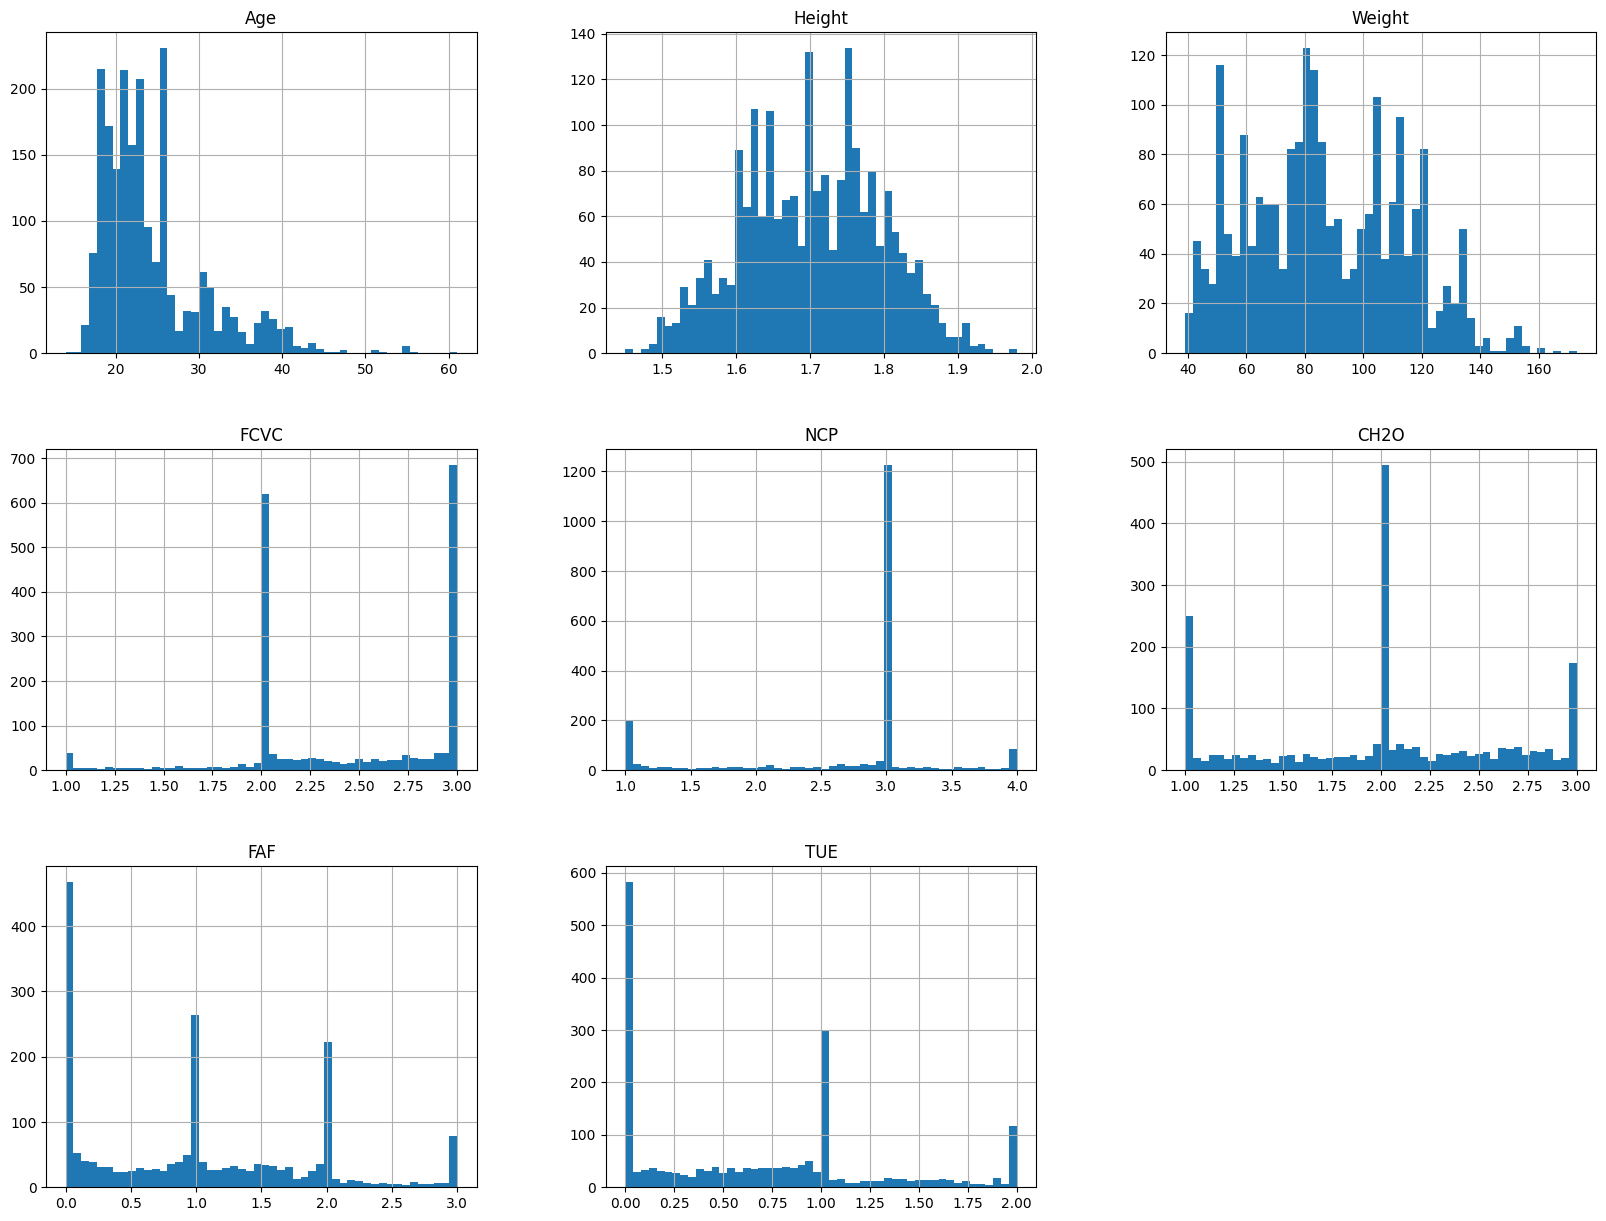

In [25]:
#análisis gráfico
data.hist(bins=50, figsize=(20,15))
plt.show()

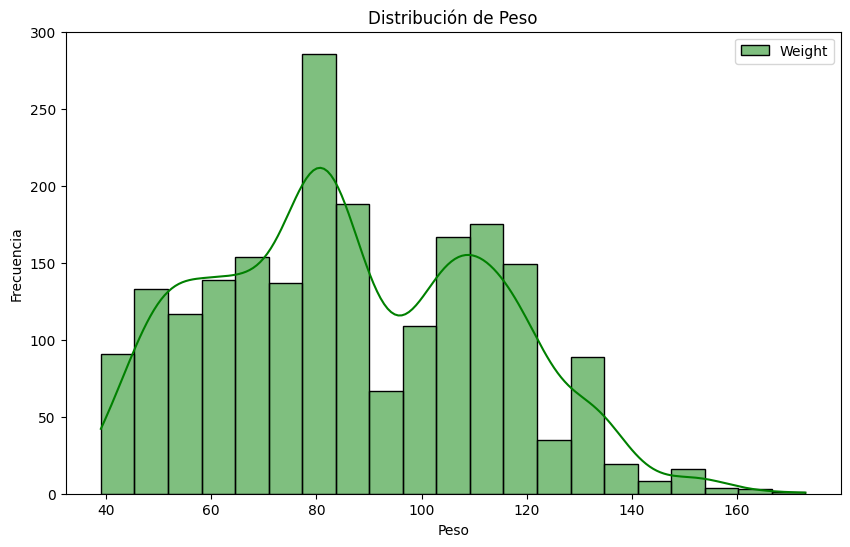

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

In [26]:
#dibujar distribución ponderada
plt.figure(figsize=(10,6))
sns.histplot(data=data,x="Weight", color="green",kde=True,label="Weight")
plt.title("Distribución de Peso")
plt.xlabel("Peso")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()
plt

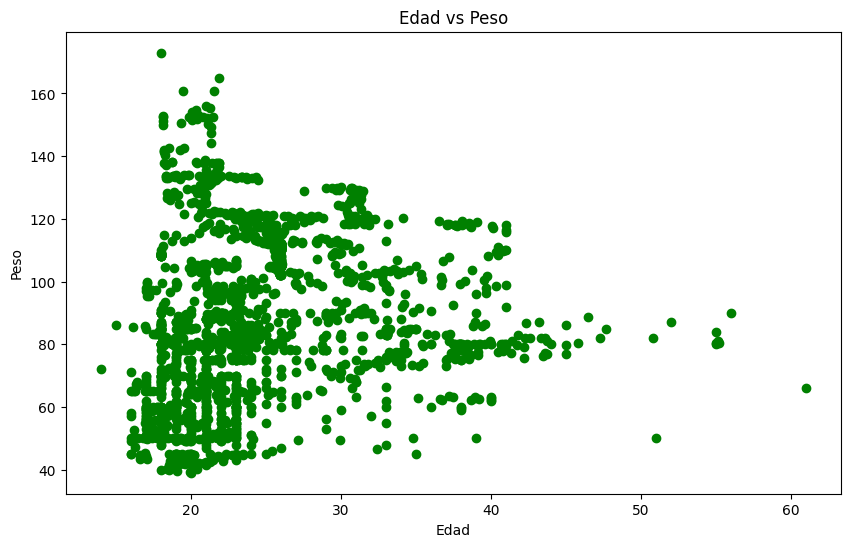

In [29]:
#graficando scatter plot (diagrama de dispercion) para evaluar edad vs peso
fig, ax = plt.subplots(figsize=(10,6)) # Assign the output to fig and ax
ax.scatter(data=data, x="Age", y="Weight", color="green") # Use ax to create the scatter plot
plt.title("Edad vs Peso")
plt.xlabel("Edad")
plt.ylabel("Peso")
plt.show() # Add plt.show() to display the plot

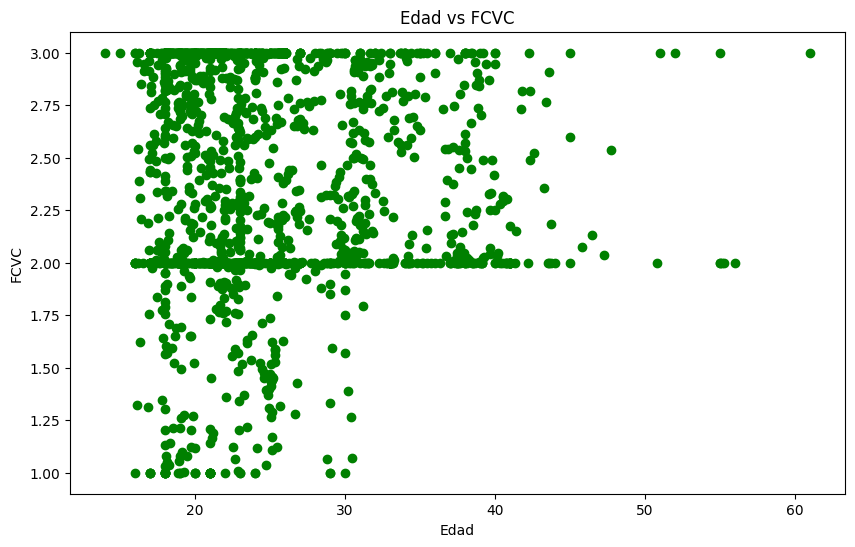

In [30]:
#análisis de dispersion
fig, ax = plt.subplots(figsize=(10,6)) # Assign the output to fig and ax
ax.scatter(data=data, x="Age", y="FCVC", color="green") # Use ax to create the scatter plot
plt.title("Edad vs FCVC")
plt.xlabel("Edad")
plt.ylabel("FCVC")
plt.show() # Add plt.show() to display the plot

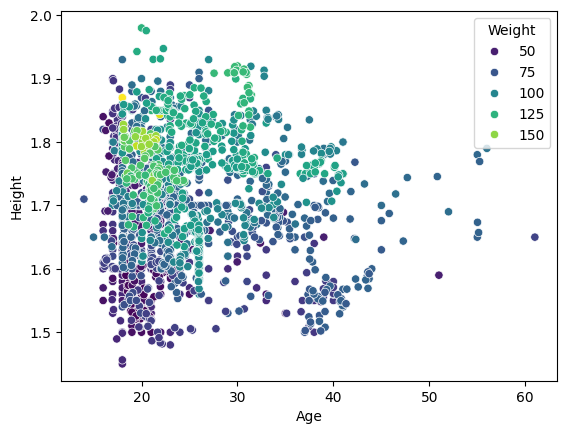

In [31]:
#DIAGRAMA DE DISPERSION ENTRE EDAD VS ESTATURA PARA DIFERENTES PESOS
scatter_plot = sns.scatterplot(data=data, x='Age', y='Height', hue='Weight', palette='viridis')

Text(0.0, 1.0, 'Altura vs Peso')

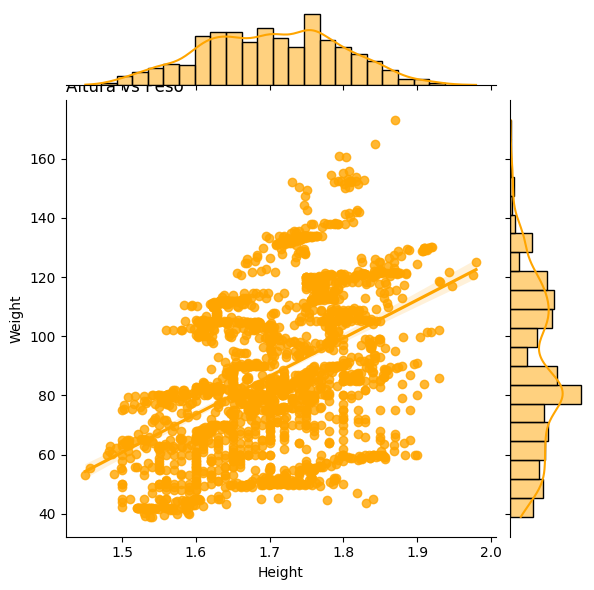

In [33]:
sns.jointplot(data=data, x='Height', y='Weight', kind='reg', color='orange')
plt.title("Altura vs Peso",loc='left')

In [58]:
#ANÁLISIS ENTRE EDAD VS PROMEDIO DE PESO PARA EL TOP 15 DE EDADES
top_15_ages=data.groupby('Age')['Weight'].mean().nlargest(15)
top_15_ages

,Weight
Age,
173.00,173.00
165.06,165.06
160.94,160.94
160.64,160.64
155.87,155.87
155.24,155.24
154.62,154.62
153.96,153.96
153.15,153.15


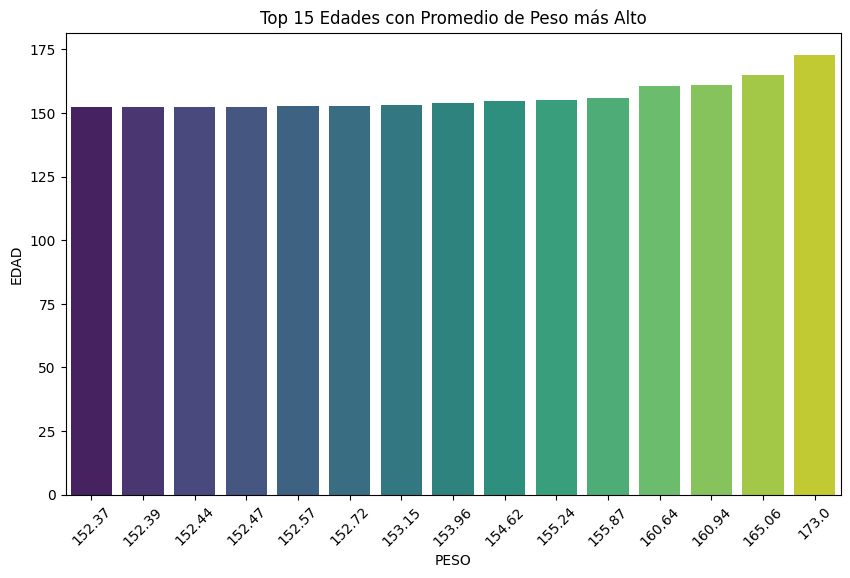

In [56]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_15_edades.index, y=top_15_edades.values, palette='viridis')
plt.title('Top 15 Edades con Promedio de Peso más Alto')
plt.xlabel('PESO')
plt.ylabel('EDAD')
plt.xticks(rotation=45)
plt.show()

In [59]:
data["CALC"]=data["CALC"].astype("category")
data["CALC"]

,CALC
0,no
1,Sometimes
2,Frequently
3,Frequently
4,Sometimes
...,...
2106,Sometimes
2107,Sometimes
2108,Sometimes
2109,Sometimes


Text(0.5, 1.0, 'Consumo de alcohol por edad')

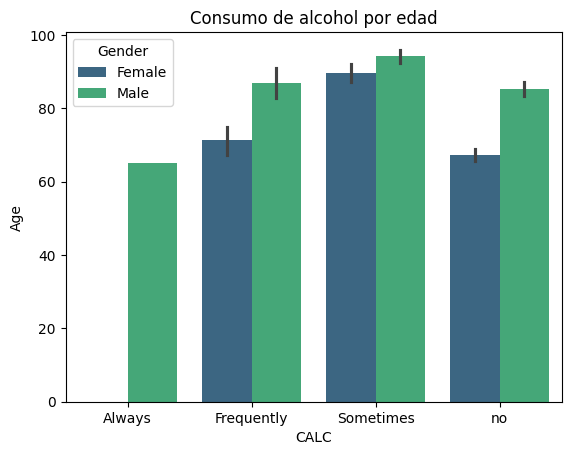

In [61]:
sns.barplot(x=data["CALC"],y=data["Age"],data=data,hue="Gender", palette="viridis")
plt.title("Consumo de alcohol por edad")

Text(0.5, 1.0, '% Consumo de alcohol para hombres y mujeres')

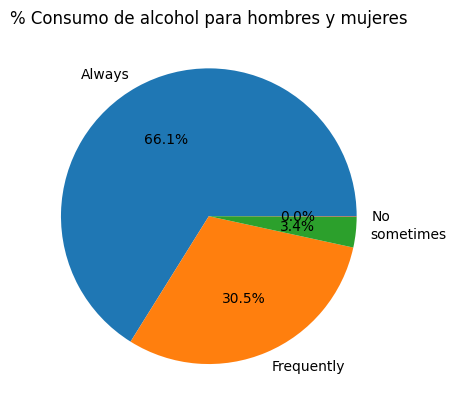

In [63]:
#diagrama de torta para ver el % de consumo de alcohol
count=data["CALC"].value_counts()
labels=["Always", "Frequently", "sometimes", "No"]
vals= count.values
plt.pie(vals,labels=labels,autopct="%1.1f%%")
plt.title("% Consumo de alcohol para hombres y mujeres")

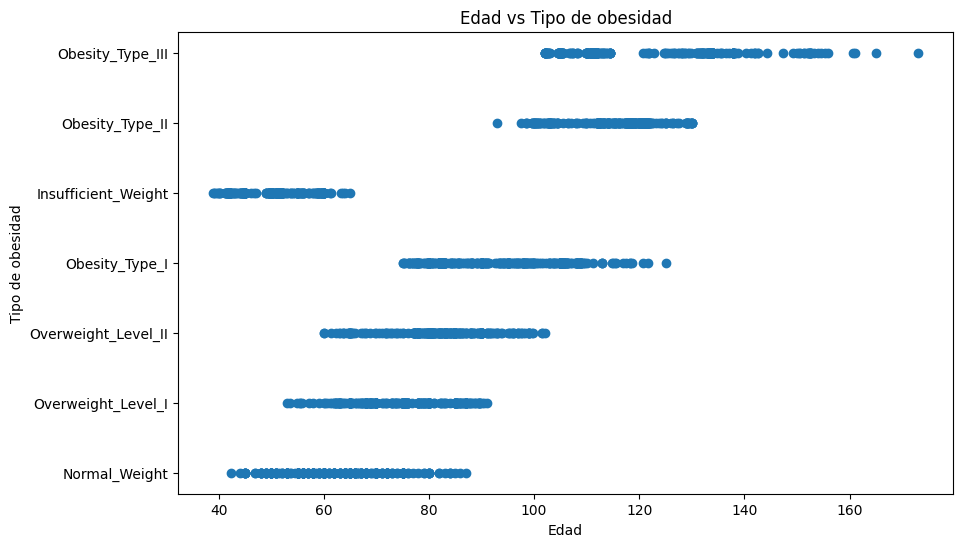

<function matplotlib.pyplot.show(close=None, block=None)>

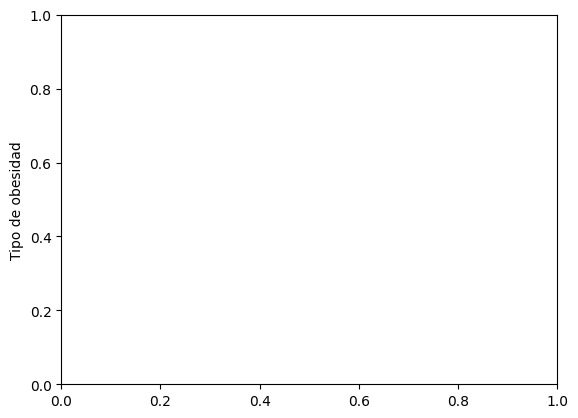

In [67]:
#grafica edad vs tipo de obesidad usando diagrama de dispersion
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(data["Age"], data["NObeyesdad"])
plt.title("Edad vs Tipo de obesidad")
plt.xlabel("Edad")
plt.ylabel("Tipo de obesidad")
plt.show()
plt.ylabel("Tipo de obesidad")
plt.show